In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
file_to_plot = '2023_02_09 21_37_45.pk'
results = pickle.load(open('./cosmotrans_out/' + file_to_plot, 'rb'))
params = results[0]
thermal_params = results[1]

/tmp/ipykernel_75885/209114186.py:13: RuntimeWarning: divide by zero encountered in log10
  pc = ax[1].pcolormesh(params['b'], params['c'], np.log10(thermal_params['betaHs']).T)
/tmp/ipykernel_75885/209114186.py:13: RuntimeWarning: invalid value encountered in log10
  pc = ax[1].pcolormesh(params['b'], params['c'], np.log10(thermal_params['betaHs']).T)


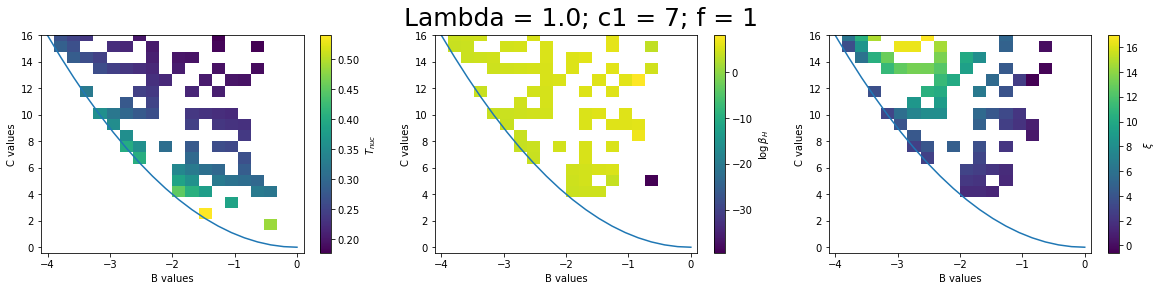

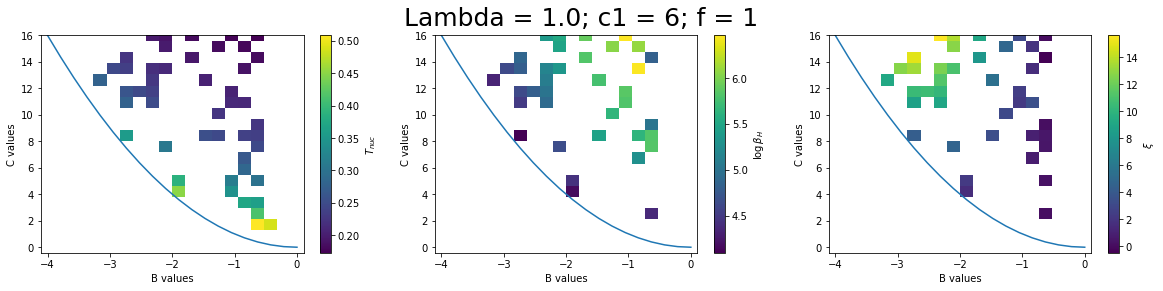

In [4]:
def plot_thermal_params(title, thermal_params):
    thermal_params['Tnucs'][thermal_params['Tnucs'] == 0] = np.nan
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))
    fig.suptitle(title, fontsize = 25)
    
    pc = ax[0].pcolormesh(params['b'], params['c'], thermal_params['Tnucs'].T)
    ax[0].set_ylabel('C values')
    ax[0].set_ylim(top=params['c'][-1])
    ax[0].plot(params['b'], params['b']**2)
    ax[0].set_xlabel('B values')
    fig.colorbar(pc, label=r'$T_{nuc}$', ax=ax[0]);

    pc = ax[1].pcolormesh(params['b'], params['c'], np.log10(thermal_params['betaHs']).T)
    ax[1].set_ylabel('C values')
    ax[1].set_ylim(top=params['c'][-1])
    ax[1].plot(params['b'], params['b']**2)
    ax[1].set_xlabel('B values')
    fig.colorbar(pc, label=r'$\log\beta_H$', ax=ax[1]);

    thermal_params['ksis'][thermal_params['ksis'] == 0 ] = np.nan
    pc = ax[2].pcolormesh(params['b'], params['c'], thermal_params['ksis'].T)
    ax[2].set_ylabel('C values')
    ax[2].set_ylim(top=params['c'][-1])
    ax[2].plot(params['b'], params['b']**2)
    ax[2].set_xlabel('B values')
    fig.colorbar(pc, label=r'$\xi$', ax=ax[2]);
    
for Lami in range(np.size(thermal_params, axis=0)):
    for c1i in range(np.size(thermal_params, axis=1)):
        for fi in range(np.size(thermal_params, axis=2)):
            title = f"Lambda = {params['Lambda'][Lami]}; c1 = {params['c1'][c1i]}; f = {params['f'][fi]}"
            plot_thermal_params(title, thermal_params[Lami, c1i, fi])

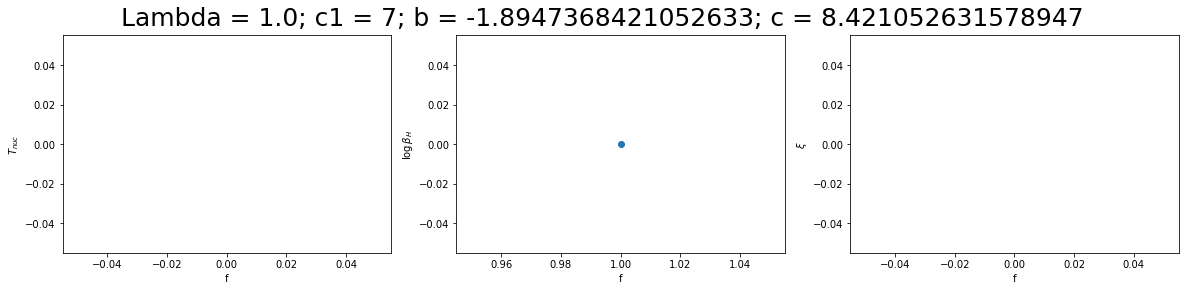

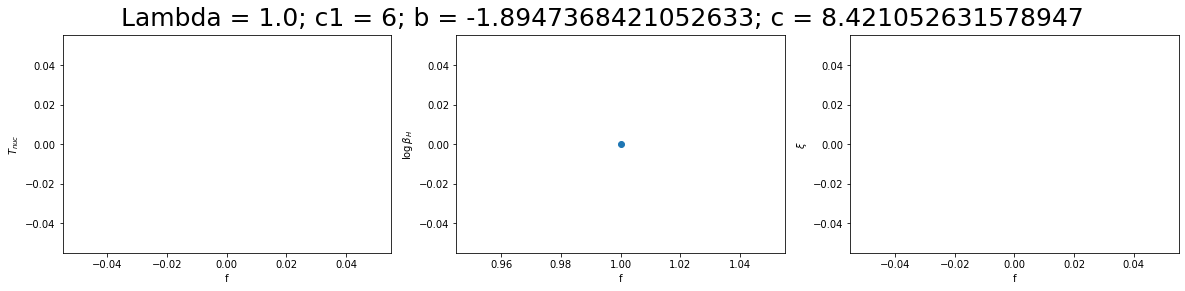

In [9]:
domain = 'f'
const_params = ['Lambda', 'c1']

for p1i in range(np.size(params[const_params[0]])):
    for p2i in range(np.size(params[const_params[1]])):
        bi = int(np.floor(params['b'].size/2))
        ci = int(np.floor(params['c'].size/2))
        title = f"{const_params[0]} = {params[const_params[0]][p1i]}; {const_params[1]} = {params[const_params[1]][p2i]}; b = {params['b'][bi]}; c = {params['c'][ci]}"
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))
        fig.suptitle(title, fontsize = 25)
        ax[0].set_ylabel(r'$T_{nuc}$')
        ax[0].set_xlabel(domain)
        ax[1].set_ylabel(r'$\log\beta_H$')
        ax[1].set_xlabel(domain)
        ax[2].set_ylabel(r'$\xi$')
        ax[2].set_xlabel(domain)
        for di in range(np.size(params[domain])):
            thermal_params[p1i, p2i, di]['Tnucs'][thermal_params[p1i, p2i, di]['Tnucs'] == 0] = np.nan
            thermal_params[p1i, p2i, di]['ksis'][thermal_params[p1i, p2i, di]['ksis'] == 0 ] = np.nan
            ax[0].scatter(params[domain][di], thermal_params[p1i, p2i, di]['Tnucs'][bi, ci])
            ax[1].scatter(params[domain][di], thermal_params[p1i, p2i, di]['betaHs'][bi, ci])
            ax[2].scatter(params[domain][di], thermal_params[p1i, p2i, di]['ksis'][bi, ci])